In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('out.csv')

In [9]:
df[df['id'] == 26][['long','lat']].to_json(orient="values")
#26 and 48

'[[55.9405475777,54.7254312515],[55.9405406692,54.7254324517],[55.940532399,54.7254326886],[55.9405496453,54.7254314555],[55.940536515,54.7254323943],[55.9405375383,54.7254323212],[55.9405437778,54.7254325812],[55.9405386345,54.7254325979],[55.9405386345,54.7254325979],[55.9405387096,54.7254329475],[55.9405323215,54.7254323365],[55.9405335085,54.7254329664],[55.940539653,54.7254325247],[55.9405354894,54.7254324677],[55.9405365909,54.7254327448],[55.9405386345,54.7254325979],[55.940536439,54.7254320436],[55.9405343848,54.7254321897],[55.9405374627,54.7254319708],[55.9405414612,54.7254313321],[55.940540446,54.7254314039],[55.9405414612,54.7254313321],[55.9405434849,54.725431189],[55.9405444934,54.7254311176],[55.9405444934,54.7254311176],[55.9405445663,54.7254314656],[55.9405454998,54.7254310464],[55.9405434849,54.725431189],[55.9405454998,54.7254310464],[55.9405475059,54.7254309045],[55.9405475059,54.7254309045],[55.9405485771,54.7254311804],[55.9405495743,54.7254311095],[55.9405475777,

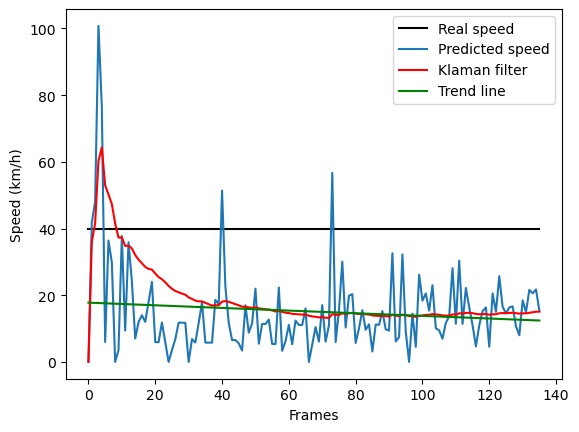

Real speed:  40
Raw mean:  15.098445083598452
Raw std:  13.586538383189115
Kalman mean:  18.850736398940768
Kalman std:  9.599419943257956


In [14]:
speed = np.array(df[df['id'] == 57]['speed'])
x = np.arange(len(speed))
trend = np.poly1d(np.polyfit(x, speed, 1))

# intial parameters---------------
n = len(speed)
sz = (n) # size of array
Q = 1e-4 # process variance
# allocate space for arrays
xhat = np.zeros(sz)      # a posteri estimate of x
P = np.zeros(sz)         # a posteri error estimate
xhatminus = np.zeros(sz) # a priori estimate of x
Pminus = np.zeros(sz)    # a priori error estimate
K = np.zeros(sz)         # Kalman gain
R = 0.4**2 # estimate of measurement variance
xhat[0] = 0.0
P[0] = 1.0

for i in range(1, n):

    xhatminus[i] = xhat[i-1]
    Pminus[i] = P[i-1] + Q

    K[i] = Pminus[i] / ( Pminus[i] + R )
    xhat[i] = xhatminus[i] + K[i] * (speed[i] - xhatminus[i])
    P[i] = (1 - K[i]) * Pminus[i]
#-------------------------------

plt.plot(x, np.linspace(40, 40, len(x)), 'black')
plt.plot(x, speed)
plt.plot(x, xhat, color='red')
plt.plot(x, trend(x), color='green')

# plt.xlabel("Кадры")
# plt.ylabel("Скокрость (км/ч)")
# plt.legend(["Реальная скорость автомобиля", "Скоросость автомобиля посчитанная алгоритмом", "Фильтр Калмана","Линия тренда"])
plt.xlabel("Frames")
plt.ylabel("Speed (km/h)")
plt.legend(["Real speed", "Predicted speed", "Klaman filter","Trend line"])
plt.show()

print("Real speed: ", 40)
print("Raw mean: ", np.mean(speed))
print("Raw std: ", np.std(speed))
print("Kalman mean: ", np.mean(xhat))
print("Kalman std: ", np.std(xhat))

In [7]:
experiment = pd.read_csv("gleb_move_gps.csv")
experiment.drop(['alt'],axis=1).to_json(orient="values")

'[[55.9397628521,54.7235344314],[55.9397628521,54.7235344314],[55.9397631035,54.7235305338],[55.9397619301,54.7235261333],[55.9397639417,54.7235248341],[55.9397660372,54.7235236188],[55.939765199,54.7235155302],[55.9397667916,54.723516117],[55.9397703958,54.7235141472],[55.9397788615,54.7235159493],[55.9397864052,54.7235231997],[55.9397744191,54.7235459565],[55.9397802864,54.7235717728],[55.9397974694,54.7236086951],[55.9398335115,54.7236881136],[55.9398722359,54.7237686637],[55.9399071885,54.7238408738],[55.9399378662,54.7239059593],[55.9399697175,54.7239727211],[55.9400015687,54.7240374713],[55.9400357669,54.7241015929],[55.9400700488,54.7241644572],[55.940111204,54.7242411935],[55.9401541193,54.7243165049],[55.9401948554,54.7243996534],[55.9402393633,54.7244835981],[55.940291834,54.7245803672],[55.940346484,54.7246825007],[55.9403993738,54.7247885737],[55.9405225878,54.7248658967],[55.9405841948,54.7249621629],[55.9406371684,54.7250562498],[55.9406877951,54.7251499594],[55.940737164

In [13]:
np.interp()

poly1d([ 0.33333333, 37.69896667])